In [4]:
# Cellule 1 — vérifier où on est et lister les fichiers
import os
print("Répertoire courant :", os.getcwd())
print("\nContenu du répertoire :")
for i, f in enumerate(sorted(os.listdir()), 1):
    print(f"{i:02d}. {f}")


Répertoire courant : /content

Contenu du répertoire :
01. .config
02. archive.zip
03. sample_data


In [5]:
# Cellule 2 — extraire archive.zip si présent
import os, zipfile
if "archive.zip" in os.listdir():
    print("archive.zip trouvé -> extraction...")
    with zipfile.ZipFile("archive.zip", "r") as z:
        z.extractall(".")
    print("Extraction terminée. Re-liste des fichiers :")
    for i, f in enumerate(sorted(os.listdir()), 1):
        print(f"{i:02d}. {f}")
else:
    print("archive.zip non trouvé dans le répertoire courant.")


archive.zip trouvé -> extraction...
Extraction terminée. Re-liste des fichiers :
01. .config
02. Test.csv
03. Train.csv
04. archive.zip
05. sample_data
06. sample_submission.csv


In [3]:
# Cellule 3 — upload manuel depuis l'ordinateur (ouvre un sélecteur de fichiers)
# Exécutez ceci si Train.csv ou Test.csv ne figurent pas dans la liste.
from google.colab import files
uploaded = files.upload()  # sélectionner Train.csv et Test.csv (si besoin)

print("\nFichiers uploadés :")
for k in uploaded.keys():
    print("-", k)

# Vérifier nouveau contenu
import os
print("\nContenu après upload :")
for i, f in enumerate(sorted(os.listdir()), 1):
    print(f"{i:02d}. {f}")


Saving archive.zip to archive.zip

Fichiers uploadés :
- archive.zip

Contenu après upload :
01. .config
02. archive.zip
03. sample_data


In [6]:
# Cellule 4 — trouver fichiers CSV proches du nom attendu (insensible à la casse)
import os, fnmatch
csv_files = [f for f in os.listdir() if f.lower().endswith(".csv")]
print("CSV trouvés :", csv_files)

# Chercher variantes de Train/Test
candidates_train = [f for f in csv_files if "train" in f.lower()]
candidates_test  = [f for f in csv_files if "test" in f.lower()]
print("Possibles Train.csv :", candidates_train)
print("Possibles Test.csv  :", candidates_test)


CSV trouvés : ['Test.csv', 'Train.csv', 'sample_submission.csv']
Possibles Train.csv : ['Train.csv']
Possibles Test.csv  : ['Test.csv']


In [7]:
# Cellule 5 — lecture robuste des CSV
import pandas as pd
import sys

# Ajustez ces variables si les noms sont différents (ex: "Train (1).csv")
TRAIN_FILENAME = "Train.csv"
TEST_FILENAME  = "Test.csv"

# Si les fichiers n'existent pas, essayer les candidats détectés automatiquement
available = set([f for f in os.listdir() if f.lower().endswith(".csv")])
if TRAIN_FILENAME not in available:
    # choisir le premier fichier contenant 'train' si disponible
    train_candidates = [f for f in available if "train" in f.lower()]
    if train_candidates:
        TRAIN_FILENAME = sorted(train_candidates)[0]
        print("Train non trouvé sous 'Train.csv'. Utilisation de :", TRAIN_FILENAME)
    else:
        raise FileNotFoundError("Train.csv introuvable. Merci d'uploader le fichier.")

if TEST_FILENAME not in available:
    test_candidates = [f for f in available if "test" in f.lower()]
    if test_candidates:
        TEST_FILENAME = sorted(test_candidates)[0]
        print("Test non trouvé sous 'Test.csv'. Utilisation de :", TEST_FILENAME)
    else:
        print("Aucun Test.csv détecté — si vous n'avez pas de test, passez à l'EDA.")

# Lire avec paramètres tolérants
def safe_read_csv(path):
    try:
        df = pd.read_csv(path, engine="python", on_bad_lines='skip')
        print(f"Lecture OK : {path} -> shape {df.shape}")
        return df
    except Exception as e:
        print(f"Erreur lecture {path} : {e}")
        raise

train = safe_read_csv(TRAIN_FILENAME)
# Charger test seulement si disponible
if TEST_FILENAME in available:
    test = safe_read_csv(TEST_FILENAME)
else:
    test = None


Lecture OK : Train.csv -> shape (8068, 11)
Lecture OK : Test.csv -> shape (2627, 10)


In [8]:
# Cellule 6 — aperçu et diagnostic des colonnes / NaN
display(train.head())
print("\nInfo générale Train :")
display(train.info())
print("\nValeurs manquantes par colonne (Train) :")
display(train.isnull().sum().sort_values(ascending=False))

if test is not None:
    print("\n--- Test.csv aperçu ---")
    display(test.head())
    print("\nValeurs manquantes par colonne (Test) :")
    display(test.isnull().sum().sort_values(ascending=False))


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A



Info générale Train :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


None


Valeurs manquantes par colonne (Train) :


,0
Work_Experience,829
Family_Size,335
Ever_Married,140
Profession,124
Graduated,78
Var_1,76
ID,0
Gender,0
Age,0
Spending_Score,0



--- Test.csv aperçu ---


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6



Valeurs manquantes par colonne (Test) :


,0
Work_Experience,269
Family_Size,113
Ever_Married,50
Profession,38
Var_1,32
Graduated,24
Gender,0
ID,0
Age,0
Spending_Score,0


In [9]:
# Cellule 7 — pipeline preprocessing + préparation données
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Colonnes attendues (ajustez si vos noms diffèrent)
expected_cat = ["Gender","Ever_Married","Graduated","Profession","Spending_Score","Var_1"]
expected_num = ["Age","Work_Experience","Family_Size"]

# Détecter dynamiquement les colonnes réellement présentes
num_cols = [c for c in expected_num if c in train.columns]
cat_cols = [c for c in expected_cat if c in train.columns]
id_col   = "ID" if "ID" in train.columns else None
target_col = "Segmentation" if "Segmentation" in train.columns else None

print("Num cols:", num_cols)
print("Cat cols:", cat_cols)
print("ID col:", id_col)
print("Target col:", target_col)

# Vérifier target
if target_col is None:
    raise ValueError("La colonne cible 'Segmentation' est absente du train. Ajoutez-la ou vérifiez le fichier.")

# Préproc pipelines
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="__missing__")),
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
], remainder="drop")

# Séparer X / y
X = train.drop(columns=[c for c in [target_col, id_col] if c in train.columns])
y = train[target_col].copy()

# Encoder cible
le_target = LabelEncoder()
y_enc = le_target.fit_transform(y)

print("Taille X:", X.shape, "Taille y:", y_enc.shape)


Num cols: ['Age', 'Work_Experience', 'Family_Size']
Cat cols: ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
ID col: ID
Target col: Segmentation
Taille X: (8068, 9) Taille y: (8068,)


In [10]:
# Cellule 8 — split et entraînement
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X, y_enc, test_size=0.20, random_state=42, stratify=y_enc)

model_pipeline = Pipeline([
    ("preproc", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
])

print("Entraînement en cours...")
model_pipeline.fit(X_train, y_train)
print("Entraînement terminé.")


Entraînement en cours...
Entraînement terminé.


In [11]:
# Cellule 9 — évaluer sur X_val
y_pred = model_pipeline.predict(X_val)
print("Accuracy (val) :", accuracy_score(y_val, y_pred))
print("\nClassification report :")
print(classification_report(y_val, y_pred, target_names=le_target.classes_))


Accuracy (val) : 0.5043370508054523

Classification report :
              precision    recall  f1-score   support

           A       0.40      0.40      0.40       394
           B       0.38      0.35      0.37       372
           C       0.56      0.51      0.53       394
           D       0.63      0.72      0.67       454

    accuracy                           0.50      1614
   macro avg       0.49      0.49      0.49      1614
weighted avg       0.50      0.50      0.50      1614



In [12]:
# Cellule 10 — prédiction sur test si disponible et sauvegarde submission
import numpy as np
if test is not None:
    # garder seulement les colonnes utilisées par X (si des colonnes manquent, elles seront ignorées)
    test_X = test[[c for c in X.columns if c in test.columns]].copy()
    # Si test n'a pas toutes les colonnes, on met des colonnes manquantes à NaN pour que preproc les gère
    for c in X.columns:
        if c not in test_X.columns:
            test_X[c] = np.nan
    # Réordonner colonnes selon X.columns
    test_X = test_X[X.columns]
    # Prédire
    preds_enc = model_pipeline.predict(test_X)
    preds = le_target.inverse_transform(np.clip(preds_enc, 0, len(le_target.classes_)-1))
    submission = pd.DataFrame({
        "ID": test[id_col] if id_col and id_col in test.columns else range(1, len(preds)+1),
        "Segmentation": preds
    })
    submission.to_csv("submission.csv", index=False)
    print("submission.csv généré (voir la première ligne) :")
    display(submission.head())
else:
    print("Aucun Test.csv disponible — pas de fichier de soumission généré.")


submission.csv généré (voir la première ligne) :


,ID,Segmentation
0,458989,B
1,458994,C
2,458996,D
3,459000,C
4,459001,D


In [13]:
# Cellule 11 — exécuter uniquement si vous avez une exception et voulez afficher la pile complète
import traceback, sys
try:
    # Exécutez ici la ligne qui posait problème, par exemple :
    # train = pd.read_csv("Train.csv")
    pass
except Exception:
    traceback.print_exc()


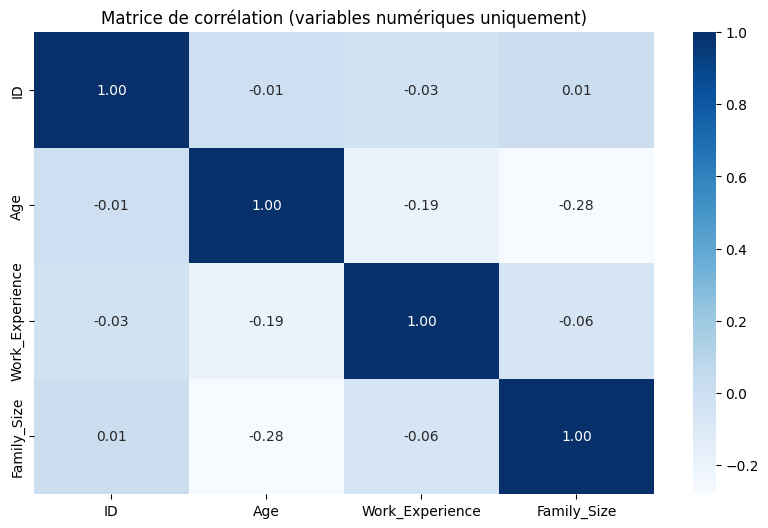

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10,6))
# Select only numerical columns for correlation calculation
sns.heatmap(train.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap="Blues")
plt.title("Matrice de corrélation (variables numériques uniquement)")
plt.show()

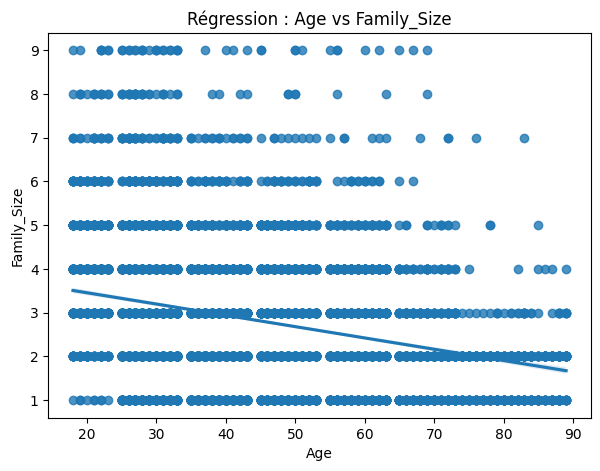

In [16]:
plt.figure(figsize=(7,5))
sns.regplot(x=train["Age"], y=train["Family_Size"])
plt.title("Régression : Age vs Family_Size")
plt.show()


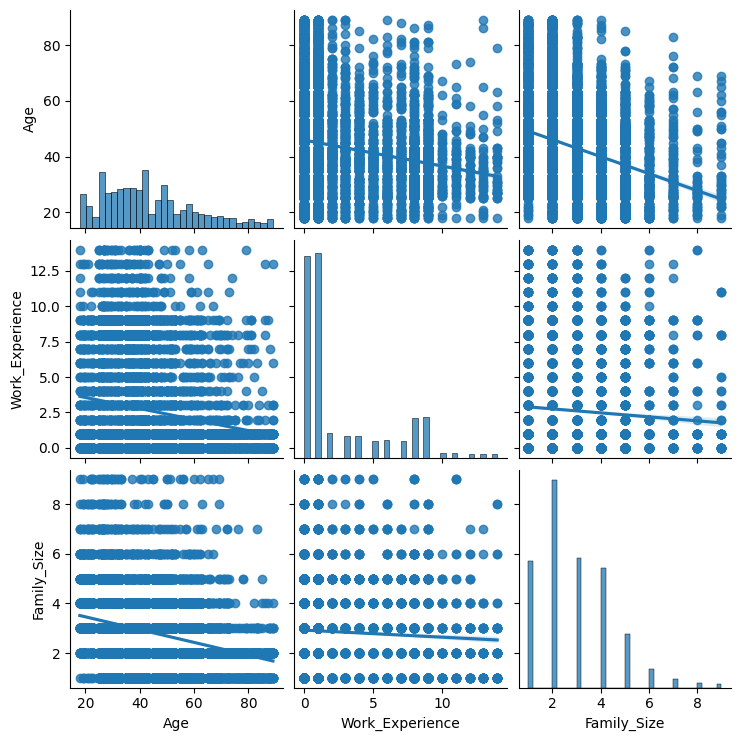

In [17]:
sns.pairplot(train[["Age", "Work_Experience", "Family_Size"]], kind="reg")
plt.show()


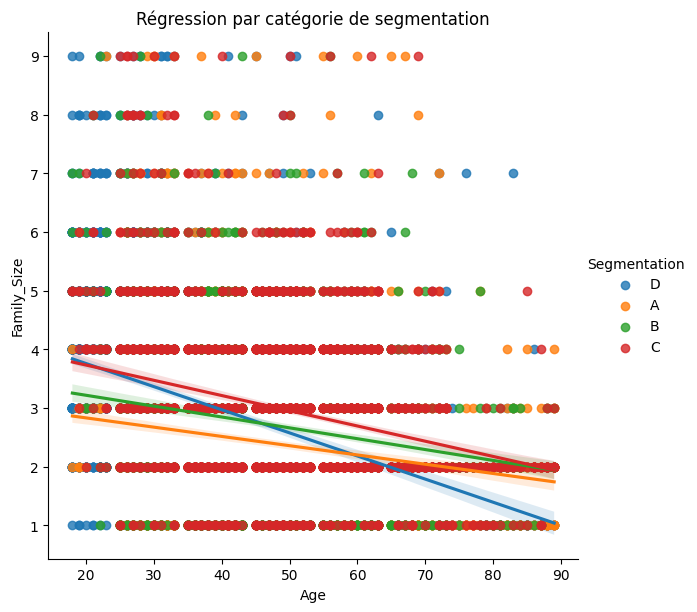

In [18]:
sns.lmplot(
    x="Age",
    y="Family_Size",
    hue="Segmentation",
    data=train,
    height=6
)
plt.title("Régression par catégorie de segmentation")
plt.show()


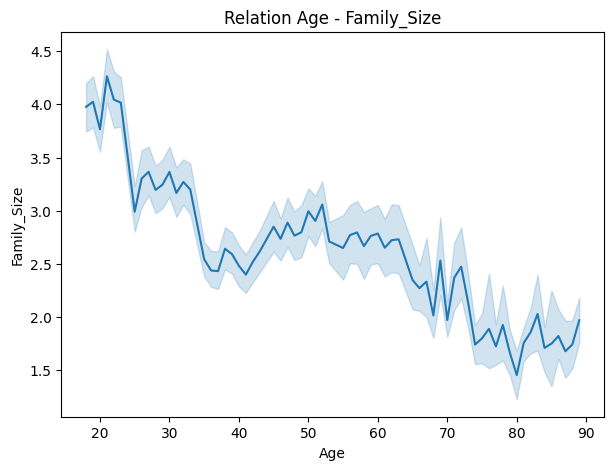

In [19]:
plt.figure(figsize=(7,5))
sns.lineplot(x="Age", y="Family_Size", data=train)
plt.title("Relation Age - Family_Size")
plt.show()


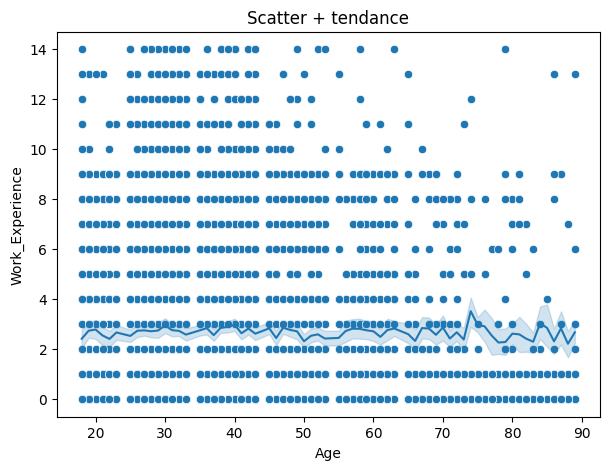

In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="Age", y="Work_Experience", data=train)
sns.lineplot(x=train["Age"], y=train["Work_Experience"].rolling(10).mean())
plt.title("Scatter + tendance")
plt.show()
